<a href="https://colab.research.google.com/github/pras5449/-Assignment-Task-6/blob/main/GUVI_Assignment5_6_7_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

**1. Find the linear regression equation for this data.**

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
x = df['Ground Temperature']
y = df['Chirps/Second']

<function matplotlib.pyplot.show(*args, **kw)>

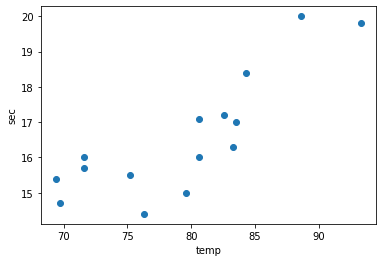

In [ ]:
plt.scatter(x,y)
plt.xlabel('temp')
plt.ylabel('sec')
plt.show

In [ ]:
x_ols=sm.add_constant(x)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model=sm.OLS(y,x_ols)     # model
result=model.fit()         #train
result.summary()

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Chirps/Second   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     29.25
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           0.000119
Time:                        09:38:37   Log-Likelihood:                -19.999
No. Observations:                  15   AIC:                             44.00
Df Residuals:                      13   BIC:                             45.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4593      2.989      0.154      0.880      -5.998       6.917
Ground Temperature     0.2030      0.038      5.408      0.000       0.122       0.284
==============================================================================
Omnibus:                        0.728   Durbin-Watson:                   0.833
Prob(Omnibus):                  0.695   Jarque-Bera (JB):                0.703
Skew:                          -0.293   Prob(JB):                        0.704
Kurtosis:                       2.117   Cond. No.                         935.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
yhat=result.params[0]+result.params[1]*x
print ("the final linear regression equation is : (yhat=result.params[0]+result.params[1]*x) ")

the final linear regression equation is : (yhat=result.params[0]+result.params[1]*x) 


**2. Chart the original data and the equation on the chart.**

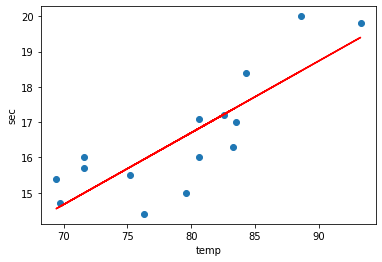

In [ ]:
plt.scatter(x,y)
plt.plot(x,yhat,c="red")
plt.xlabel("temp")
plt.ylabel("sec")
plt.show()

**3a. Find the equation's  R2  score**

In [ ]:
result.rsquared

0.6922946529147005

**3b.whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [ ]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


**4.  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?**

In [ ]:
temp_95 = result.params[0]+result.params[1]*95
temp_95

19.74428912896874

**5. at a rate of 18 chirps per second. What was the approximate ground temperature that morning?**

In [ ]:
chirps_18 = (18-result.params[0])/result.params[1]
chirps_18

86.40743134548569

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("/content/brain_body.txt")
df.head() 

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
df.shape

(62, 2)

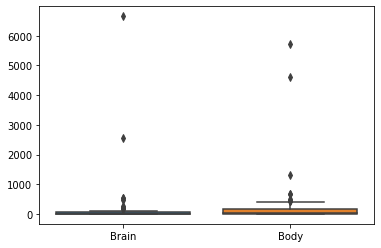

In [ ]:
sns.boxplot(data=df)

**Handling outliers**   
1. Formula for upper bound = (Q3+1.5*IQR)


*   Q1, Q2, Q3 = 25%, 50%, 75%  
*   IQR = Q3 -Q1



In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
upper_brain = 48.20 + (1.5*(48.20 - 0.6))
upper_body = 166 + (1.5*(166-4.25))
print(upper_brain,upper_body)

119.60000000000001 408.625


In [ ]:
df = df[(df['Body']<upper_body) & (df['Brain']<upper_brain) ]
df.shape

(50, 2)

**1.Find the linear regression equation for this data for brain weight to body weight.**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
y = df['Brain']  # dependent
x = df[['Body']] # independent

In [ ]:
reg = LinearRegression().fit(x, y)
reg.coef_, reg.intercept_

(array([0.25210108]), -0.3986717066213341)

**Formula --> brain = -0.3986 + 0.2521 * body**

**2. Chart the original data and the equation on the chart.**

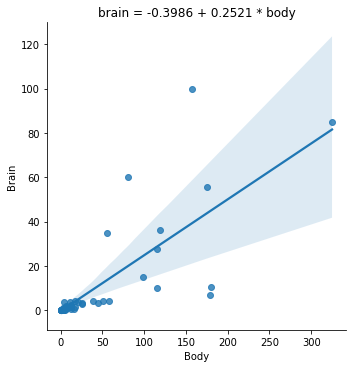

In [ ]:
sns.lmplot(x="Body", y="Brain", data=df)
plt.title("brain = -0.3986 + 0.2521 * body")
plt.show()

**3a. Find the equation's  R2  score ?**  
**3b. whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [ ]:
print("The R2-Score is :",reg.score(x,y))

The R2-Score is : 0.5936656494301653


In [ ]:
df.corr()

,Brain,Body
Brain,1.000000,0.770497
Body,0.770497,1.000000


In [ ]:
0.770492**2

0.5936579220639999

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df2 = pd.read_fwf("/content/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df2.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


**1.Find the linear regression equation for this data using columns 1-5 to column 6.**

In [ ]:
input = df2[["Sex", "Rank", "Year", "Degree", "YSdeg"]]
target = df2.Salary

In [ ]:
sal_linreg = linear_model.LinearRegression()
sal_linreg.fit(input, target)

all_inp = sal_linreg.score(input, target)
all_inp_coef = (sal_linreg.intercept_, sal_linreg.coef_)
print("R2 Score: ", all_inp)
print("Intercept & Coefficients: ", all_inp_coef)

R2 Score:  0.8547180674410969
Intercept & Coefficients:  (11410.14654725559, array([ 1241.7924996 ,  5586.18144952,   482.85976783, -1331.64406341,
        -128.79057354]))


**actual formula : b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4 + b5*x5**    
formula : salary = 11410.14 + ( (1241.79 * sex) + (5586.18 * rank) + (482.85 * year) - (1331.644 * degree) - (128.79 * YSdeg) )

**2. Find the selection of columns with the best  R2  score.**

In [ ]:
import itertools as it

In [ ]:
def lin_reg_focus(input, df, focus='Salary'):
    input_cols = df[input]
    focus_output = df[focus]
    lin_regr_sal = linear_model.LinearRegression()
    lin_regr_sal.fit(input_cols, focus_output)
    return lin_regr_sal.score(input_cols, focus_output)

In [ ]:
def get_combos(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

In [ ]:
def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_reg_focus(list(n), df, focus)] = n
    return combo_scores

In [ ]:
combos = get_combos(input)

In [ ]:
combo_scores = all_combo_scores(combos, df2)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335426, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485596, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533503, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

**The selection with the best R2 score is: 'Sex', 'Rank', 'Year', 'Degree', 'YSdeg' having R2 score of 0.8547 (as seen above)**

**3. Report whether sex is a factor in salary.**

Sex red
Rank green
Year blue
Degree yellow
YSdeg pink


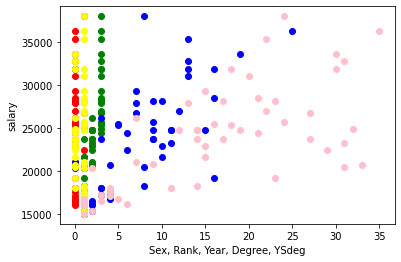

In [ ]:
colors = np.array(["black","green","blue","yellow","pink"])
for i,j in zip(input,colors):
  print(i,j)
  plt.scatter(df2[i], target, c=j)
plt.xlabel("Sex, Rank, Year, Degree, YSdeg")
plt.ylabel("salary")
plt.show()

In [ ]:
df2['Sex'].value_counts()

0    38
1    14
Name: Sex, dtype: int64

Here we can see that the dataset is imbalanced dataset...so with the help of over sampling ...we are going to balance the dataset

In [ ]:
input = df2[["Rank", "Year", "Degree", "YSdeg",'Salary']]
target = df2.Sex

In [ ]:
input.head()

,Rank,Year,Degree,YSdeg,Salary
0,3,25,1,35,36350
1,3,13,1,22,35350
2,3,10,1,23,28200
3,3,7,1,27,26775
4,3,19,0,30,33696


In [ ]:
target.head()

0    0
1    0
2    0
3    1
4    0
Name: Sex, dtype: int64

In [ ]:
from imblearn.combine import SMOTETomek #For Over Sampling

In [ ]:
model_ = SMOTETomek()
x_o,y_o = model_.fit_resample(input,target)

In [ ]:
model_new = SMOTETomek(sampling_strategy= 0.5)

In [ ]:
x_o.shape,y_o.shape 

((60, 5), (60,))

In [ ]:
y_o.value_counts()

0    30
1    30
Name: Sex, dtype: int64

In [ ]:
sal_linreg = linear_model.LinearRegression()
sal_linreg.fit(x_o, y_o)
print("R2 Score: ", sal_linreg.score(x_o, y_o))
print("Intercept & Coefficients: ", sal_linreg.intercept_, sal_linreg.coef_)

R2 Score:  0.5115714856682528
Intercept & Coefficients:  0.5307088150790942 [-5.11462013e-01 -6.58621190e-02  4.04683730e-01  3.97399752e-02
  2.14113004e-05]


**As we can see that the factor 'Sex' has a score (0.5115), indicating that it has a significant impact on the salary**